In [2]:
# for this notebook make the path in the same folder (currently is in the project folder)
import os
import sys
import importlib

# Add the path to the val03 folder to sys.path so modules in the same folder can be imported
sys.path.append(os.path.join('notebooks', '103 different weighted'))

from scripts import style
importlib.reload(style)
style.set_style()

In [4]:
# === EXAMPLE USAGE: run one transform and see both spaces ==================

import importlib
import py103

importlib.reload(py103)

from py103 import run_transform_experiment

# Linear trend (degree=1) on log_close, printing metrics in y-space and price-space
log_result, log_model, df_nvda = run_transform_experiment(
    transform_name="log_close",
    ticker="NVDA",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
    poly_degree=1,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== NVDA Elastic Net trend on transform 'log_close' (degree=1) ===
Alpha=0.1000, l1_ratio=0.50
Variance of transformed series: 2.742335e+00

--- Metrics in TRANSFORM space (y_t) and PRICE space (Close) ---
[train    ]  y: RMSE=0.380285, lin=0.337416, exp=0.324839   |  price: RMSE=1.603957, lin=1.851242, exp=1.850685
[val      ]  y: RMSE=0.395646, lin=0.397221, exp=0.375377   |  price: RMSE=8.759559, lin=9.001509, exp=8.638061
[test     ]  y: RMSE=0.466980, lin=0.490752, exp=0.480235   |  price: RMSE=49.782921, lin=56.981616, exp=57.410486
[train_val]  y: RMSE=0.384179, lin=0.364121, exp=0.367513   |  price: RMSE=4.592938, lin=5.977809, exp=6.273328


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== Weighted-training comparison for transform 'log_close' (degree=3) ===
Alpha=0.1000, l1_ratio=0.50, ratio_last_first=10.0
[mode=plain ]  VAL y: RMSE=0.395646, lin=0.397221, exp=0.375377   |  VAL price: RMSE=8.759560, lin=9.001509, exp=8.638061
[mode=linear]  VAL y: RMSE=0.549710, lin=0.602406, exp=0.577935   |  VAL price: RMSE=15.662604, lin=18.373264, exp=18.300250
[mode=exp   ]  VAL y: RMSE=0.529955, lin=0.577182, exp=0.550635   |  VAL price: RMSE=14.474972, lin=16.708137, exp=16.464127


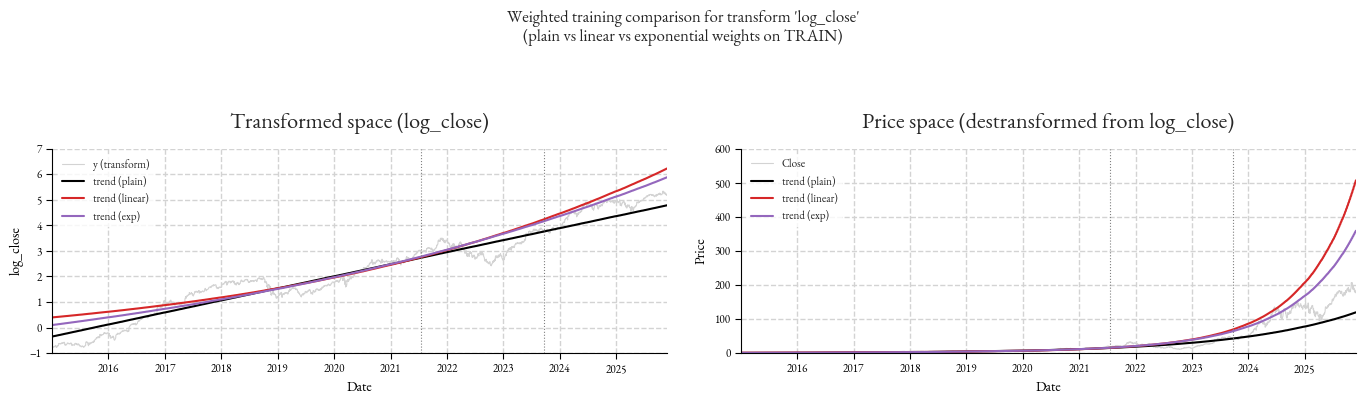

In [5]:
# === EXAMPLE USAGE: weighted training comparison, log_close, degree=3 ======

import importlib
import py103

importlib.reload(py103)

from py103 import (
    run_weighted_training_comparison_single_transform,
    plot_weighted_training_comparison,
)

results_by_mode, models_by_mode, df_nvda = (
    run_weighted_training_comparison_single_transform(
        transform_name="log_close",
        ticker="NVDA",
        start="2015-01-01",
        end=None,
        alpha=0.1,
        l1_ratio=0.5,
        random_state=0,
        train_frac=0.6,
        val_frac=0.2,
        ratio_last_first=10.0,
        poly_degree=3,
    )
)

# Visual comparison of the three training schemes (y-space + price-space)
plot_weighted_training_comparison(
    df=df_nvda,
    models_by_mode=models_by_mode,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  """



=== NVDA Elastic Net trend on transform 'log_close' (degree=1) ===
Alpha=0.1000, l1_ratio=0.50
Variance of transformed series: 2.742335e+00

--- Metrics in TRANSFORM space (y_t) and PRICE space (Close) ---
[train    ]  y: RMSE=0.380285, lin=0.337416, exp=0.324839   |  price: RMSE=1.603957, lin=1.851242, exp=1.850686
[val      ]  y: RMSE=0.395646, lin=0.397221, exp=0.375377   |  price: RMSE=8.759560, lin=9.001509, exp=8.638061
[test     ]  y: RMSE=0.466980, lin=0.490752, exp=0.480235   |  price: RMSE=49.782920, lin=56.981614, exp=57.410485
[train_val]  y: RMSE=0.384179, lin=0.364121, exp=0.367513   |  price: RMSE=4.592938, lin=5.977809, exp=6.273328

=== Validation residual diagnostics (transform, transform='log_close') ===
n = 548
mean(resid) = -1.124278e-01
std(resid)  = 3.796824e-01
t-stat (H0: mean=0) = -6.9318,  p-value = 0.0000
skewness = -0.1798,  excess kurtosis = -1.0636


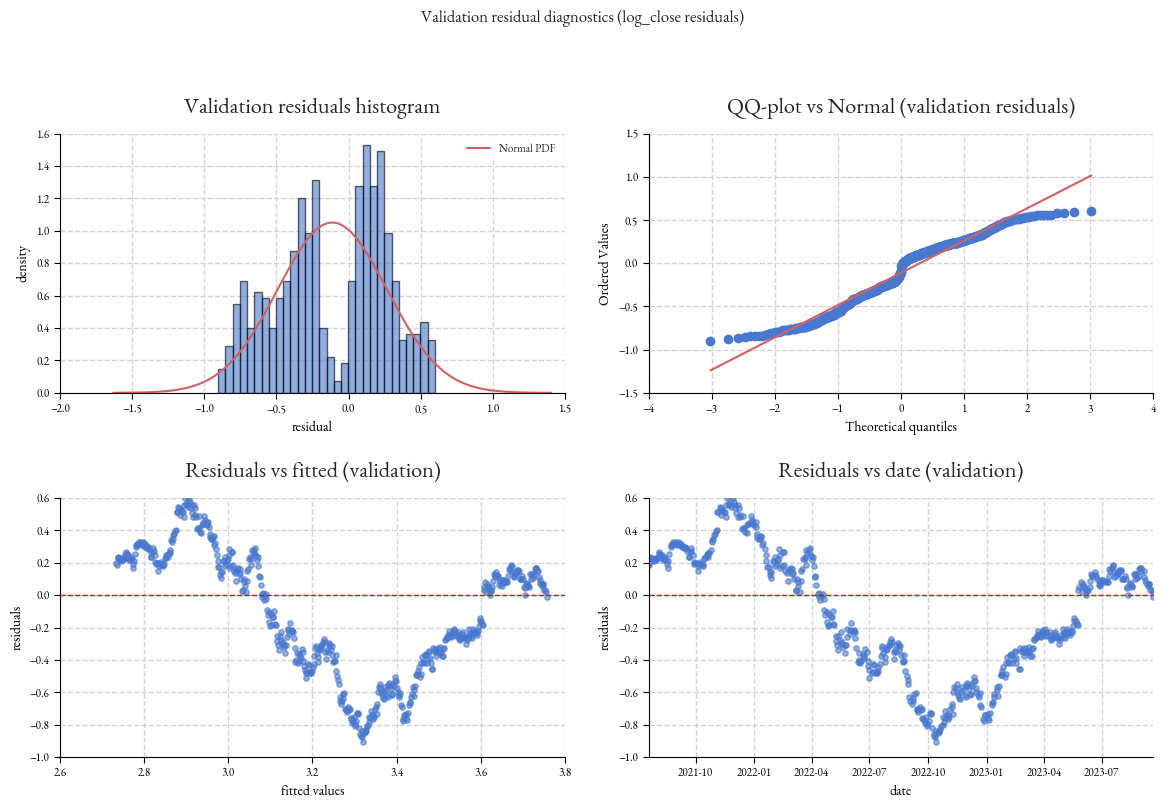


=== Validation residual diagnostics (price, transform='log_close') ===
n = 548
mean(resid) = -2.266839e+00
std(resid)  = 8.468896e+00
t-stat (H0: mean=0) = -6.2659,  p-value = 0.0000
skewness = -0.0070,  excess kurtosis = -1.2735


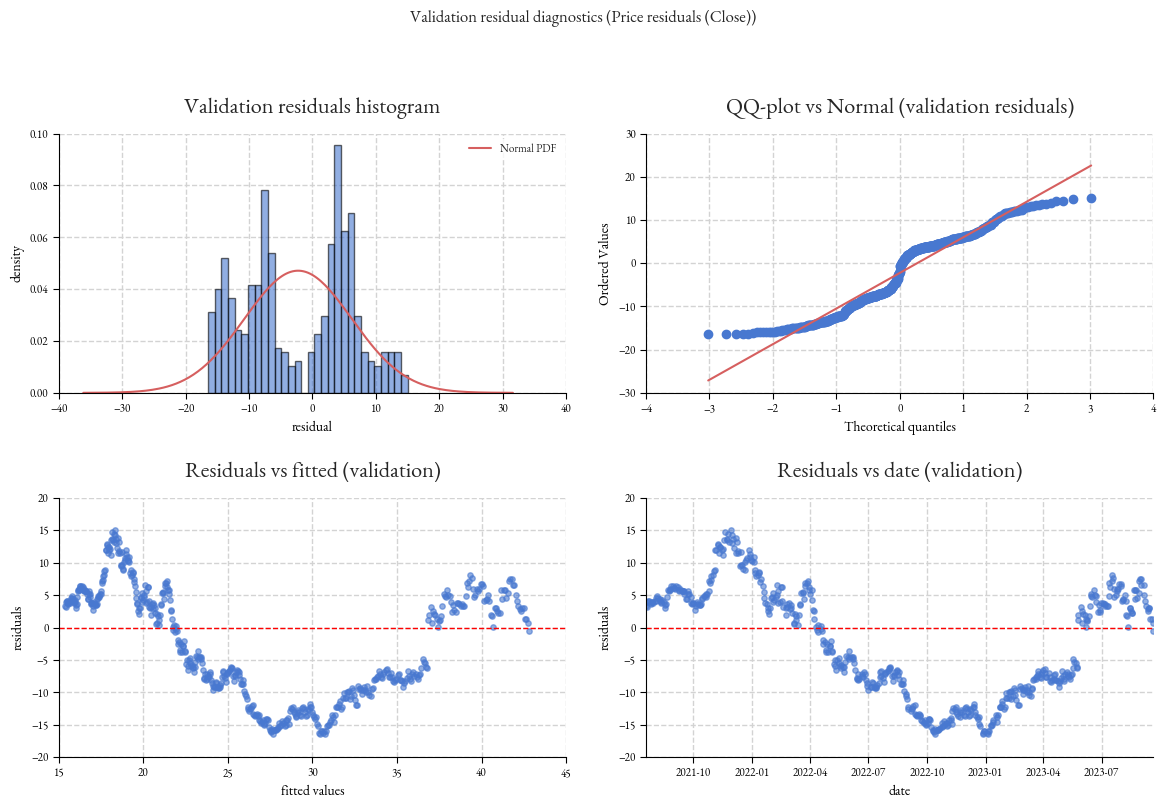

In [ ]:
# === EXAMPLE USAGE 1: single transform, single model =======================
# e.g. in a notebook cell

import importlib
import py103

importlib.reload(py103)

from py103 import (
    run_transform_experiment,
    plot_validation_residual_diagnostics,
)

# Fit (say) linear-in-time model on log_close
log_result, log_model, df_nvda = run_transform_experiment(
    transform_name="log_close",
    ticker="NVDA",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
    poly_degree=2,
)

# 1) Residual diagnostics in TRANSFORM space (log_close)
plot_validation_residual_diagnostics(
    df=df_nvda,
    model=log_model,
    transform_name="log_close",
    space="transform",
    train_frac=0.6,
    val_frac=0.2,
)

# 2) Residual diagnostics in PRICE space (Close after destransformation)
plot_validation_residual_diagnostics(
    df=df_nvda,
    model=log_model,
    transform_name="log_close",
    space="price",
    train_frac=0.6,
    val_frac=0.2,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== Normality-regularized model selection for transform 'log_close' (normality_space=price) ===
Grids: alpha=[0.01, 0.1, 1.0], l1_ratio=[0.1, 0.5, 0.9], degree=[1, 2, 3], weights=['plain', 'linear', 'exp']
Objective: obj = 1.0 * RMSE_val_price + 1.0 * JB_stat

alpha=0.01, l1=0.10, deg=1, wmode=plain       | VAL price RMSE=12.709470 | JB=36.538, p=0.000 | obj=49.247812
alpha=0.01, l1=0.10, deg=1, wmode=linear      | VAL price RMSE=8.291112 | JB=38.688, p=0.000 | obj=46.978709
alpha=0.01, l1=0.10, deg=1, wmode=exp         | VAL price RMSE=9.227537 | JB=36.222, p=0.000 | obj=45.449226
alpha=0.01, l1=0.10, deg=2, wmode=plain       | VAL price RMSE=10.932973 | JB=34.646, p=0.000 | obj=45.578717
alpha=0.01, l1=0.10, deg=2, wmode=linear      | VAL price RMSE=8.398259 | JB=38.259, p=0.000 | obj=46.657677
alpha=0.01, l1=0.10, deg=2, wmode=exp         | VAL price RMSE=8.711874 | JB=38.130, p=0.000 | obj=46.841571
alpha=0.01, l1=0.10, deg=3, wmode=plain       | VAL price RMSE=12.985245 | JB=64.7

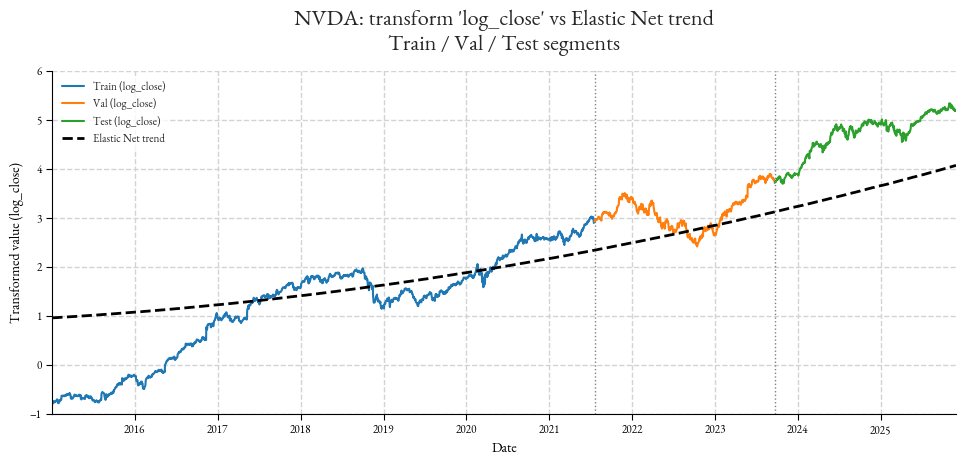

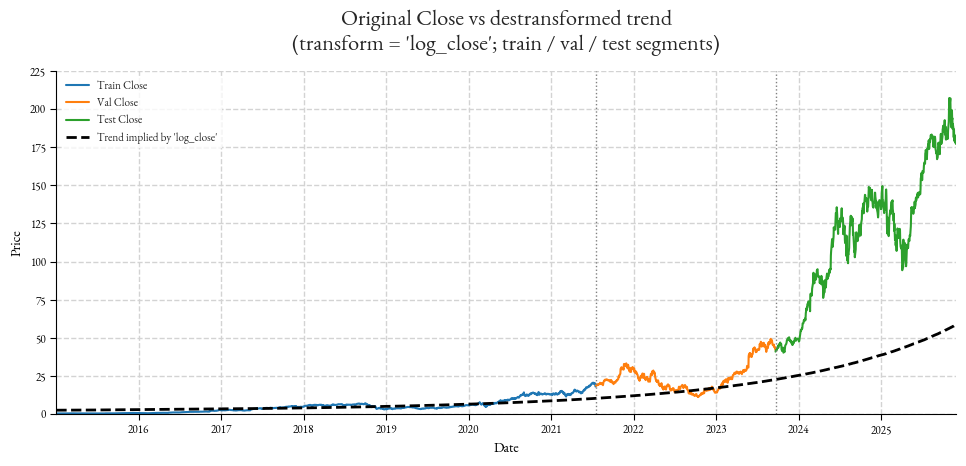


=== Validation residual diagnostics (price, transform='log_close') ===
n = 548
mean(resid) = 8.993640e+00
std(resid)  = 8.156488e+00
t-stat (H0: mean=0) = 25.8121,  p-value = 0.0000
skewness = 0.3305,  excess kurtosis = -0.8417


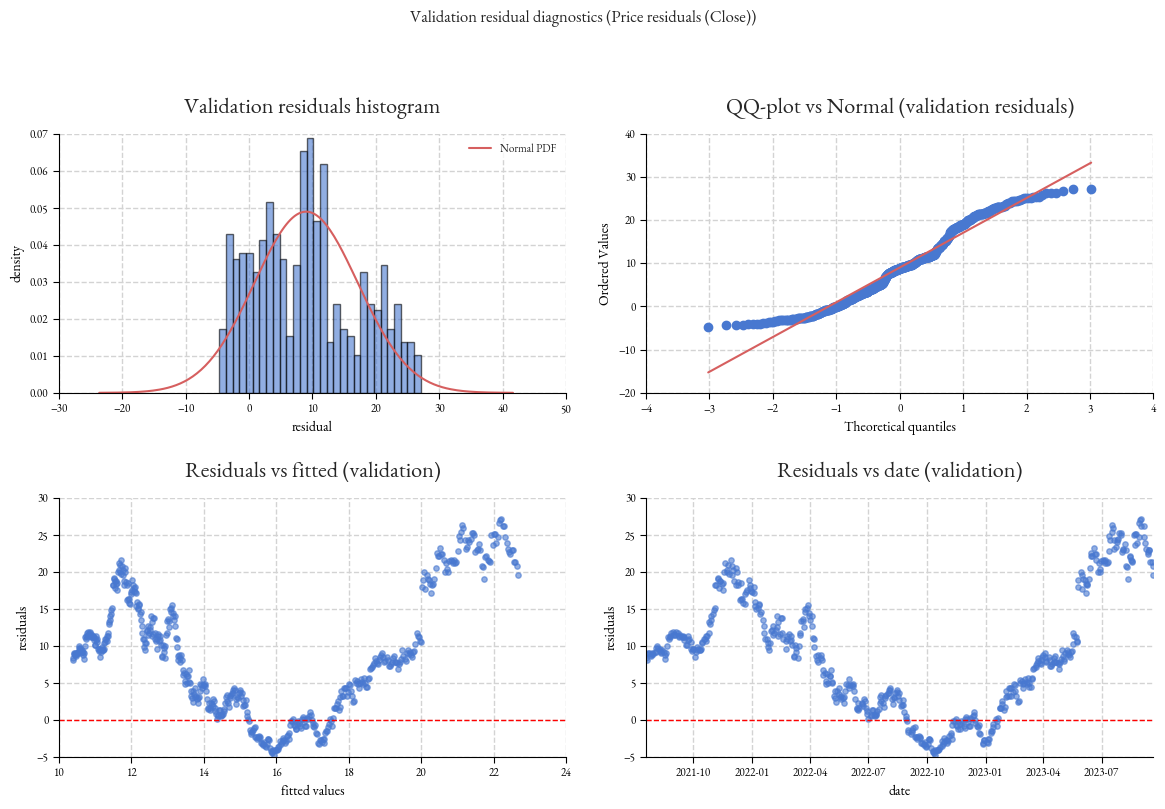

In [10]:
# example_normality_regularized_log_close.py

import importlib
import py103

importlib.reload(py103)

from py103 import (
    run_normality_regularized_model_single_transform,
    plot_validation_residual_diagnostics,
    plot_transform_trend,
    plot_destransformed_price_trend,
)

# Choose reasonable grids (adjust as needed)
alpha_grid = (0.01, 0.1, 1.0)
l1_ratio_grid = (0.1, 0.5, 0.9)
poly_degree_grid = (1, 2, 3)
train_weight_modes = ("plain", "linear", "exp")

best_summary, best_model, all_candidates, df_nvda = (
    run_normality_regularized_model_single_transform(
        transform_name="log_close",
        ticker="NVDA",
        start="2015-01-01",
        end=None,
        alpha_grid=alpha_grid,
        l1_ratio_grid=l1_ratio_grid,
        poly_degree_grid=poly_degree_grid,
        train_weight_modes=train_weight_modes,
        train_frac=0.6,
        val_frac=0.2,
        random_state=0,
        ratio_last_first=10.0,
        w_rmse=1.0,
        w_jb=1.0,              # increase this to prioritize normality more
        normality_space="price",  # or "transform"
    )
)

print("\nBest model summary:")
for k, v in best_summary.items():
    if k in {"metrics_y", "metrics_price", "normality_stats"}:
        continue
    print(f"  {k}: {v}")

# 1) Visualize fit in transform space and price space
plot_transform_trend(
    df_nvda,
    best_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)

plot_destransformed_price_trend(
    df_nvda,
    best_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)

# 2) Residual diagnostics for the chosen normality-regularized model
plot_validation_residual_diagnostics(
    df=df_nvda,
    model=best_model,
    transform_name="log_close",
    space="price",       # see residuals in price space
    train_frac=0.6,
    val_frac=0.2,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== NVDA Elastic Net trend on transform 'log_close' (degree=1) ===
Alpha=0.1000, l1_ratio=0.50
Variance of transformed series: 2.742335e+00

--- Metrics in TRANSFORM space (y_t) and PRICE space (Close) ---
[train    ]  y: RMSE=0.380285, lin=0.337416, exp=0.324839   |  price: RMSE=1.603957, lin=1.851242, exp=1.850686
[val      ]  y: RMSE=0.395646, lin=0.397221, exp=0.375377   |  price: RMSE=8.759559, lin=9.001509, exp=8.638061
[test     ]  y: RMSE=0.466980, lin=0.490752, exp=0.480235   |  price: RMSE=49.782919, lin=56.981613, exp=57.410483
[train_val]  y: RMSE=0.384179, lin=0.364121, exp=0.367513   |  price: RMSE=4.592938, lin=5.977809, exp=6.273328


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\103 different weighted\py103.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== Normality-regularized model selection for transform 'log_close' (normality_space=price) ===
Grids: alpha=[0.01, 0.1, 1.0], l1_ratio=[0.1, 0.5, 0.9], degree=[1, 2, 3], weights=['plain', 'linear', 'exp']
Objective: obj = 1.0 * RMSE_val_price + 1.0 * JB_stat

alpha=0.01, l1=0.10, deg=1, wmode=plain       | VAL price RMSE=12.709470 | JB=36.538, p=0.000 | obj=49.247813
alpha=0.01, l1=0.10, deg=1, wmode=linear      | VAL price RMSE=8.291112 | JB=38.688, p=0.000 | obj=46.978711
alpha=0.01, l1=0.10, deg=1, wmode=exp         | VAL price RMSE=9.227537 | JB=36.222, p=0.000 | obj=45.449229
alpha=0.01, l1=0.10, deg=2, wmode=plain       | VAL price RMSE=10.932973 | JB=34.646, p=0.000 | obj=45.578717
alpha=0.01, l1=0.10, deg=2, wmode=linear      | VAL price RMSE=8.398259 | JB=38.259, p=0.000 | obj=46.657680
alpha=0.01, l1=0.10, deg=2, wmode=exp         | VAL price RMSE=8.711874 | JB=38.130, p=0.000 | obj=46.841573
alpha=0.01, l1=0.10, deg=3, wmode=plain       | VAL price RMSE=12.985245 | JB=64.7

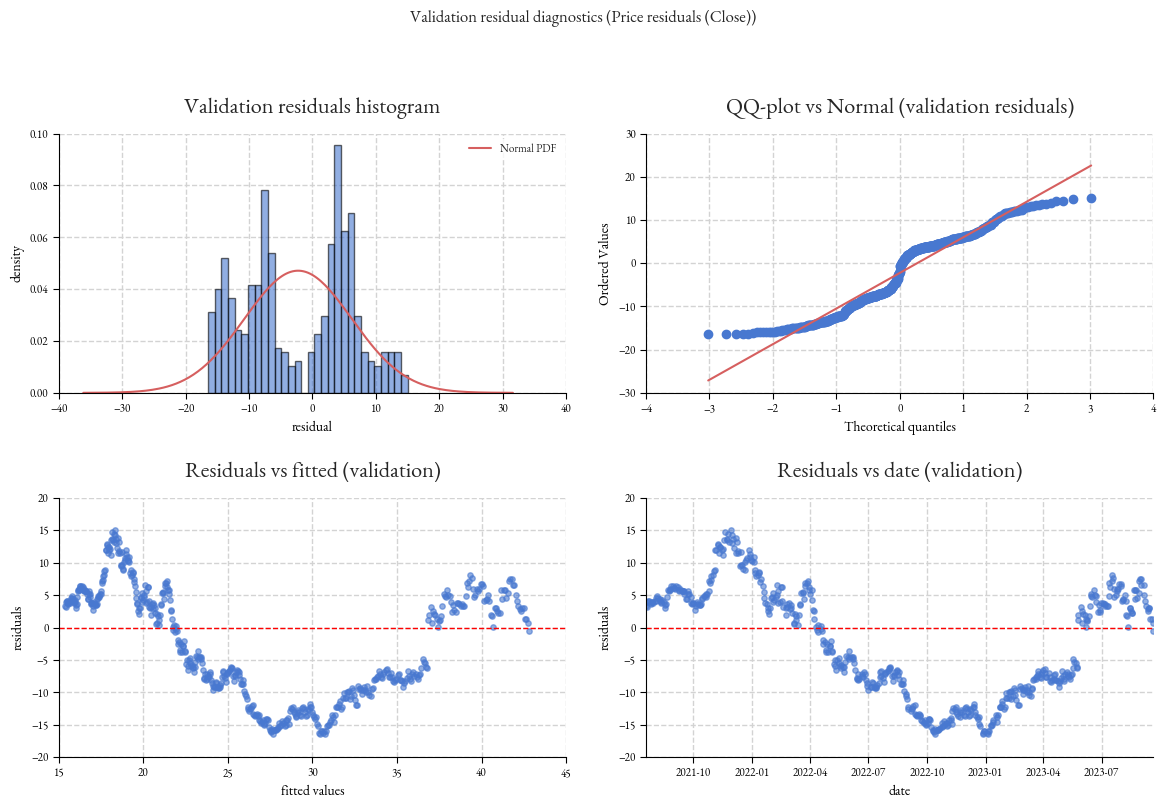


Normality-regularized model residuals (price space, validation):

=== Validation residual diagnostics (price, transform='log_close') ===
n = 548
mean(resid) = 8.993640e+00
std(resid)  = 8.156488e+00
t-stat (H0: mean=0) = 25.8121,  p-value = 0.0000
skewness = 0.3305,  excess kurtosis = -0.8417


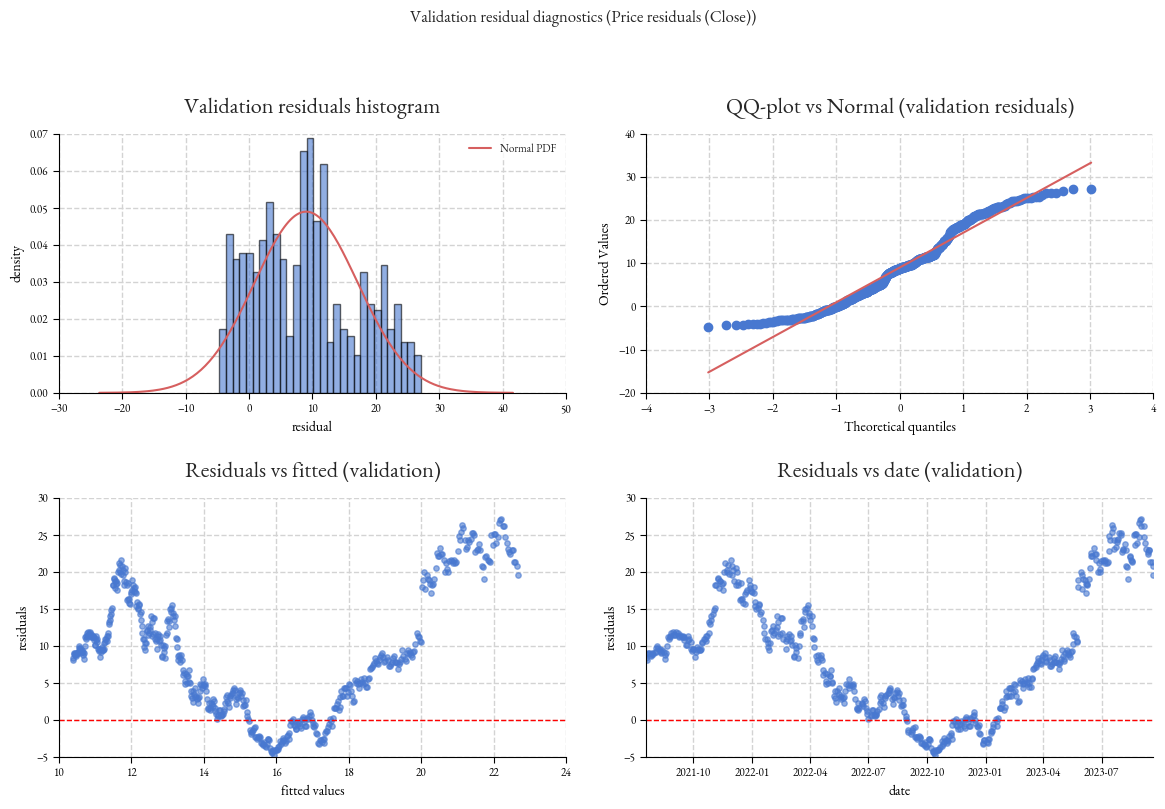

In [11]:
# example_compare_plain_vs_normality_regularized.py

import importlib
import py103

importlib.reload(py103)

from py103 import (
    run_transform_experiment,
    run_normality_regularized_model_single_transform,
    plot_validation_residual_diagnostics,
)

# Plain reference model: e.g. alpha=0.1, degree=1, plain weights
plain_result, plain_model, df_nvda = run_transform_experiment(
    transform_name="log_close",
    ticker="NVDA",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
    poly_degree=1,
)

# Normality-regularized selection
best_summary, best_model, all_candidates, _ = (
    run_normality_regularized_model_single_transform(
        transform_name="log_close",
        ticker="NVDA",
        start="2015-01-01",
        end=None,
        alpha_grid=(0.01, 0.1, 1.0),
        l1_ratio_grid=(0.1, 0.5, 0.9),
        poly_degree_grid=(1, 2, 3),
        train_weight_modes=("plain", "linear", "exp"),
        train_frac=0.6,
        val_frac=0.2,
        random_state=0,
        ratio_last_first=10.0,
        w_rmse=1.0,
        w_jb=1.0,
        normality_space="price",
    )
)

print("\nPlain vs normality-regularized (validation, price space):")
from py103 import compute_price_space_metrics_for_model

plain_price_metrics = compute_price_space_metrics_for_model(
    df_nvda,
    model=plain_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)
best_price_metrics = compute_price_space_metrics_for_model(
    df_nvda,
    model=best_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)

print("Plain model VAL price metrics:", plain_price_metrics["val"])
print("Normality-reg model VAL price metrics:", best_price_metrics["val"])

# Residual diagnostics side-by-side (price space)

print("\nPlain model residuals (price space, validation):")
plot_validation_residual_diagnostics(
    df=df_nvda,
    model=plain_model,
    transform_name="log_close",
    space="price",
    train_frac=0.6,
    val_frac=0.2,
)

print("\nNormality-regularized model residuals (price space, validation):")
plot_validation_residual_diagnostics(
    df=df_nvda,
    model=best_model,
    transform_name="log_close",
    space="price",
    train_frac=0.6,
    val_frac=0.2,
)
